# 0 基础概念介绍

## 0.1 约定

今后都默认执行了导入如下库的语句

In [2]:
# 导入库
import matplotlib.pyplot as plt
import numpy as np

## 0.2 matplot各个部分的名称


一些部分解说
* Axis 就是坐标轴
* Figure 就是一整个图，一张图内可以绘制多个子图表
* Subplot Figure中绘制的多个子图表
* Axes 可以近似视为是Subplot
![NameImage](https://matplotlib.org/_images/anatomy.png)

### 0.2.2 Figure
Figure就是绘制的整个图，一个Figure可以有多个子图表（Axes），如下面是一个Figure内有4个Axes（子图表）

(<matplotlib.figure.Figure at 0x1ea0ce23208>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA0CE988D0>,
       dtype=object))

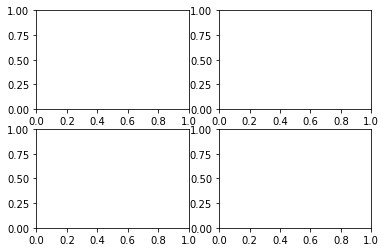

In [12]:
plt.subplots(2,2)  # a figure with a 2x2 grid of Axes

### 0.2.3 Axes（子图表）
见上面

# 1. Matlplotlib入门

## 1.2 Plot简单作图

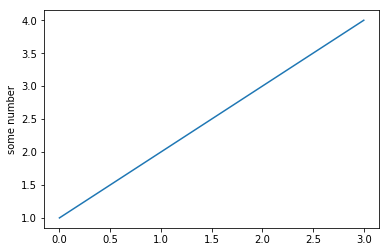

In [23]:
plt.plot([1,2,3,4])
plt.ylabel("some number")
plt.show()

这是个最简单的作图代码，用了plot。
```
plt.plot([1,2,3,4])
```
表示绘制x坐标，y坐标为``[1,2,3,4]``的直线
```
plt.show()
```
绘制完成后使用show()将其显示出来

### 1.2.1 指定点的x，y坐标

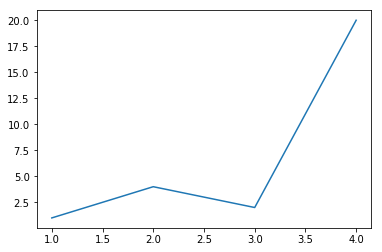

In [24]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 20])
# plot如果传入两个数组，则分别代表着点的x坐标和y坐标

### 1.2.2Plot 画点图
通过在传入的坐标后传入额外参数，可以指定画的线的形式，如'ro'表示画红色点图
```
'ro'
r表示颜色为红色，b为蓝色,g为绿色......
o表示线的形式，-为直线....
```
如果不指定默认是为'b-'表示画蓝线

其中`plt.axis([0, 6, 0, 20])`表示指定了坐标轴`[xmin, xmax, ymin, ymax]`（xy轴的范围）

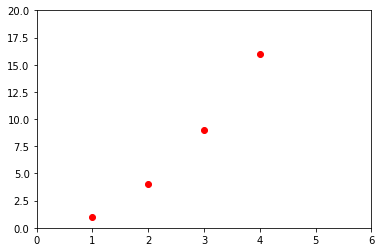

In [25]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

### 1.2.3 在一张图里绘制多条曲线


可以给plot传递多个xy点坐标轴绘制多条曲线，也可以多次调用plot绘制多条曲线：如

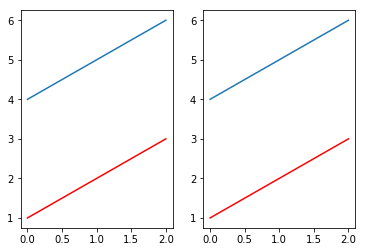

In [59]:
plt.subplot(121)
plt.plot([1,2,3],'r-',[4,5,6])

# 两种不同画法，subplot用法之后会讲解
plt.subplot(122)
plt.plot([1,2,3],'r-')
plt.plot([4,5,6])

### 1.2.4 matplot和numpy结合
如果matplot只能传入list则在数学方面会限制它的用法，matplot也可以和numpy结合使用对数学有更大帮助


下面是用`np.arrange`生成了一个起点0终点5，步进0.2的数列


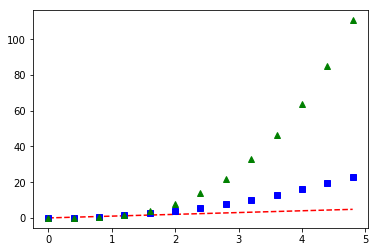

In [27]:
t = np.arange(0., 5., 0.4)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

  
### 1.2.5 定制曲线的样式
之前已经稍微介绍了怎么定制曲线样式，现在详细讲解
可以定制的样式包括：
```
宽度
线样式
颜色...
```
具体参考`matplotlib.lines.Line2D`的说明文档
  
改变样式的方法很多：

&nbsp; &nbsp; 1.直接指定属性值，如

```python
plt.plot(x, y, linewidth=2.0)
```

&nbsp; &nbsp; 2. 用曲线对象的设置函数
当用plot绘图后，会返回一个line对象（*如果绘制了多条曲线，则是返回lines*），通过调用对象的`set_xxx`方法可以设置属性，如：

```python
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialising
```

&nbsp; &nbsp;  3. 调用`plt.setp()`方法

```python
lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
```

**如果直接传入一个线对象，则`setp`返回这个线对象的所有属性**

```python
lines = plt.plot([1, 2, 3])
plt.setp(lines)

Out:
    
alpha: float
animated: [True | False]
antialiased or aa: [True | False]
...snip
```

## 1.3 创建子图表
一张图里可以有多个图表，被称为subplot,通过使用plt.subplot方法可以创建子图表。
  
`plt.figure()`方法首先指定了要选中的figure编号（后面详细讲）。
这里选中了1号，实际上不写也没事，因为matplot默认选中1号figure

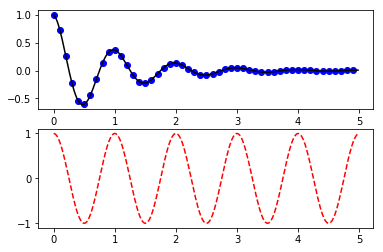

In [3]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.figure(1)

# 这里通过211指定接下来plot要绘制在哪里
# 分别意思是： 总共几行 总共几列 要绘制在第几张图表上
# 其中第几张图表通过 行x列决定
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

### 1.3.1 使用多figure

  一个图(figure)里可以有多个图表,那么也意味着可以有多个图（figure）
  通过plt.figure(n)来选择figure。默认图编号为1，选中后，plt.plot方法就在指定的图内绘制

E:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Figure 1')

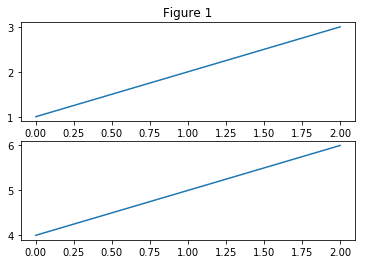

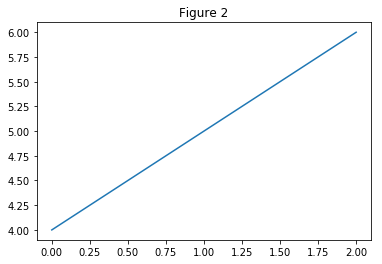

In [35]:
plt.figure(1) # 默认图表1
plt.subplot(211)
plt.plot([1, 2, 3])
plt.subplot(212)
plt.plot([4, 5, 6])
            
# 选中figure 2，在figure 2下绘制
plt.figure(2)
plt.plot([4, 5, 6])
plt.title('Figure 2')

# 选中figure 1，则所有更改都在figure 1下进行
plt.figure(1)
plt.subplot(211)
plt.title('Figure 1')

### 1.3.2 删除figure
使用`plt.clf()`可以直接删除当前选中的figure

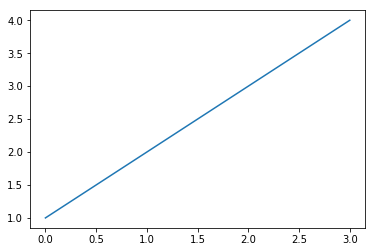

In [42]:
plt.figure(1)
plt.plot([1,2,3,4])
plt.figure(2)
plt.plot([2,3,4,5])
# 在这里删除掉了第二个figure
plt.clf()

### 1.3.3 close() figure释放内存
单纯用clf()删除figure并不会释放内存，如果使用了很多figure，需要手动调用plt.close()关闭figure释放内存

In [43]:
plt.close()

### 1.3.4 调整子图表之间间距

当子图表之间间距太小，需要调整时，使用方法
```pyhton
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```
其中wspace是水平方向间距
hspace是垂直方向间距，如：

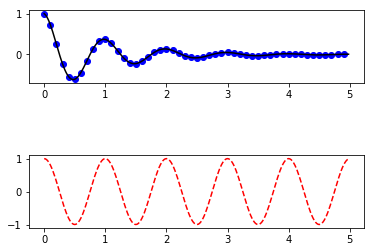

In [6]:
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

# 调整间距
plt.subplots_adjust(hspace=1)
plt.show()

## 1.4 为图表添加文本
  `plt.text()`方法可以为图表任意位置添加文本
  
  **注意：text添加文本的坐标位置为图表内坐标值**
  
  `plt.title()`方法可以为图表添加标题
  
  `plt.xlabel()`方法可以为图表x轴添加文本
  
  `plt.ylabel()`方法可以为图表y轴添加文本
  


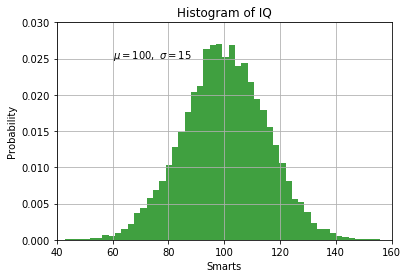

In [49]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

# x,y轴文本
plt.xlabel('Smarts')
plt.ylabel('Probability')

# 图表标题
plt.title('Histogram of IQ')

# 图表任意位置的文本,text添加文本的坐标位置为图表内坐标值
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')

plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

所有的`text,xlabel,ylabel...`方法都可以返回text对象，用这个对象的的setp()方法可以定制文字属性，如：

* 字体
* 字色
* 字号

也可以绘制文本时直接传入属性指定属性，属性的值可以参考pdf文档的`Text properties and layout.`
```python
t = plt.xlabel('my data', fontsize=14, color='red')
```

### 1.4.2 文本内使用数学符号
matplot内置Tex引擎，可以书写数学公式和符号。书写方式为用$符号包裹前后内容，如：

```python
r'$\mu=100,\ \sigma=15$'
```
**注意，python的字符串一定要用r''来指定其为raw字符串。**

matplot也可以改用自己安装的LaTex引擎，具体改用方法参考pdf的`Text rendering With LaTeX.`

### 1.4.3 添加标注文本
通过`plt.annotate`可以为图表增加标注文本，如：
下例中：
* 第一个参数为标注文本
* 第二个xy属性为要标注的坐标位置
* 第三个xytext为标注文本所在坐标位置
* 第四个arrowprops为标注的箭头样式

``
更多的标注讲解，参考pdf文件的：Basic annotation和Advanced Annotation。

例子可以参考 ：sphx_glr_gallery_text_labels_and_annotations_annotation_demo.py```

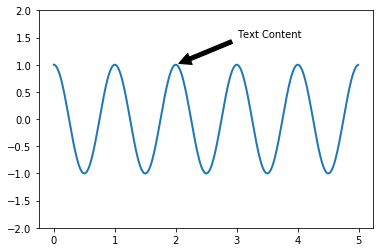

In [53]:
ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('Text Content', xy=(2, 1), xytext=(3, 1.5),
arrowprops=dict(facecolor='black', shrink=0.05),
)
plt.ylim(-2, 2)
plt.show()

## 1.5 其他坐标轴系统
通过`plt.xscale和plt.yscale`可以改变坐标的缩放实现更好的大数之类的显示，如：
```python
plt.yscale('linear')
表示线性坐标轴
plt.yscale('log')
为log坐标轴
plt.yscale('symlog', linthreshy=0.01)
为symlog坐标轴
```


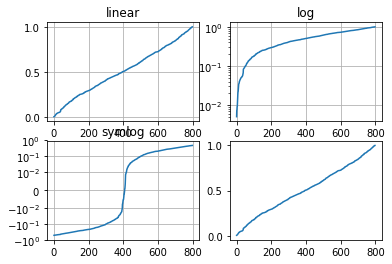

In [55]:
from matplotlib.ticker import NullFormatter # useful for `logit` scale
# Fixing random state for reproducibility
np.random.seed(19680801)
# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))
# plot with various axes scales
plt.figure(1)
# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)
# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)
# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)
# logit
plt.subplot(224)
plt.plot(x, y)

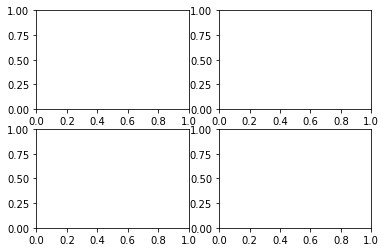

In [22]:
figure1 = plt.figure()
axes = figure1.subplots(2,2)
